In [4]:
def smooth_lst (lst, win_size):
    
    smoothed_lst = []
    for i in range (len(lst)-win_size+1):
        ss_lst = lst[i:i+win_size]
        smoothed_lst.append(sum(ss_lst)/win_size)
    
    return smoothed_lst
    
lst = [1, 5,7,10,5,4,6,16,19,52,58,56,100]
win_size = 3
print (len (lst))

lst = smooth_lst (lst, win_size)
print (len (lst))


13
11


# Normalized coverage

Populating the interactive namespace from numpy and matplotlib


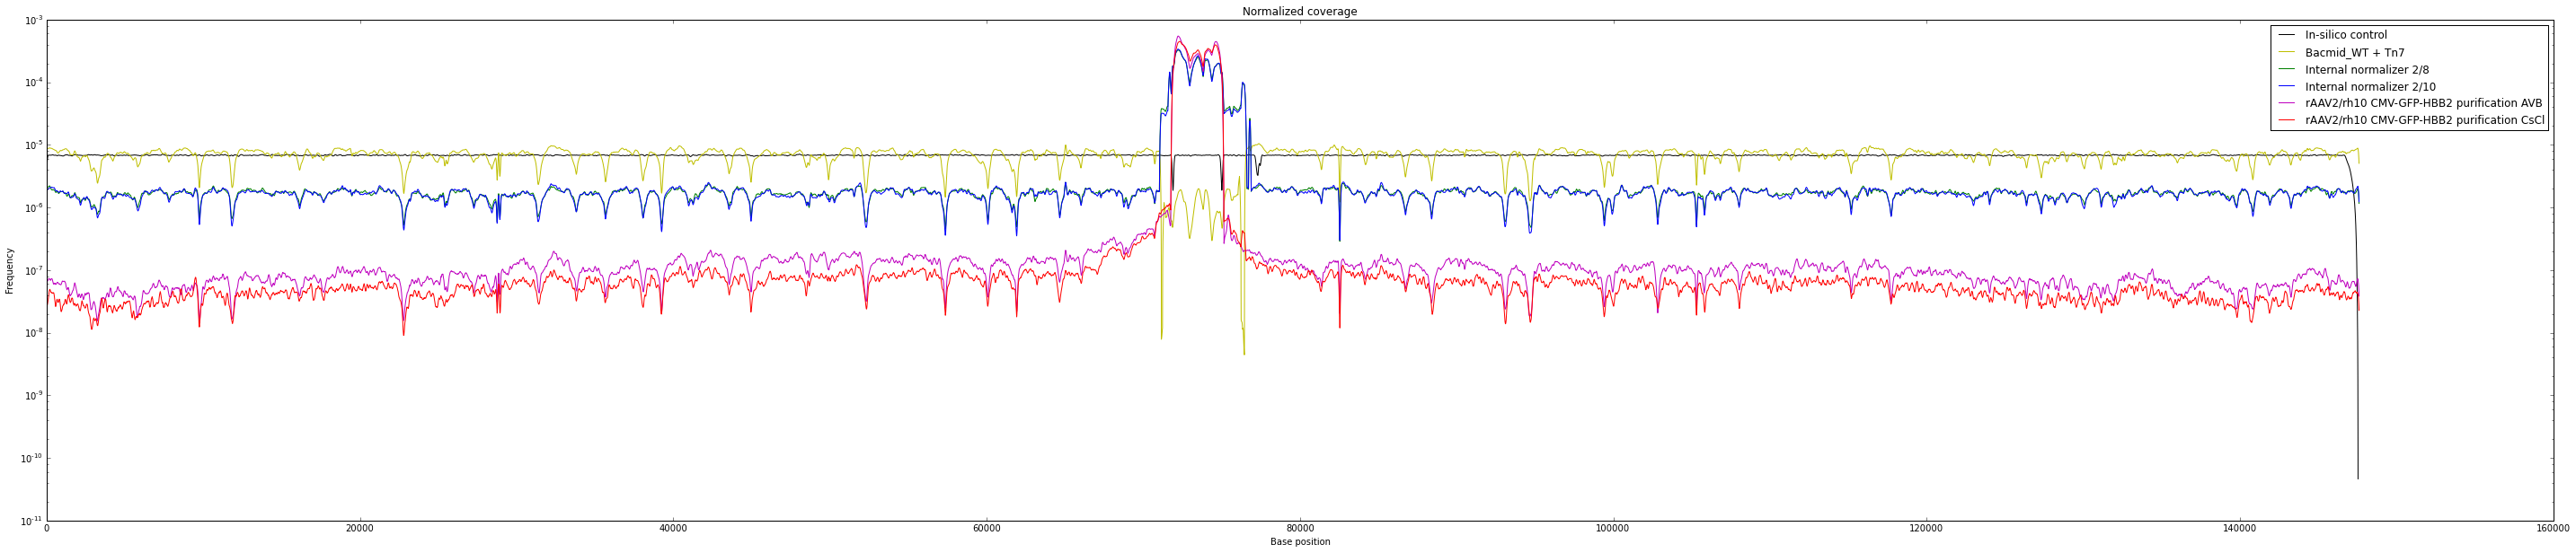

In [12]:
%pylab inline 
import csv
from matplotlib import pyplot as plt
with open ("./../bioinformatics/NGS/3_ANALYSES/AAV_CMV_GFP_prod_baculo/analyse_BAC_RUN3_Bacmid_GFP/results/All_references_normalized_modified_ipython", "r") as csvh:
    csv_reader = csv.reader(csvh, delimiter='\t')
    csv_reader.next() # passe la première ligne contenant le nom des ech
    sample_list = []
    for line in csv_reader:
        sample_list.append([float(i) for i in line])
    tlist = zip(*sample_list)
    
    # extract smoothed list for each sample
    win_size = 100
    ech1 = smooth_lst(tlist[0], win_size)
    ech2 = smooth_lst(tlist[1], win_size)
    ech3 = smooth_lst(tlist[2], win_size)
    ech4 = smooth_lst(tlist[3], win_size)
    ech5 = smooth_lst(tlist[4], win_size)
    ech6 = smooth_lst(tlist[5], win_size)
    
plt.figure(figsize=(50, 10))
plt.title("Normalized coverage")
plt.xlabel("Base position")
plt.ylabel("Frequency")
#plt.ylim(1,77869)
#plt.xlim(0,3298)

line1 = plt.plot(ech1, 'k', label = 'In-silico control')
line2 = plt.plot(ech2, 'y', label = 'Bacmid_WT + Tn7')
line3 = plt.semilogy(ech3, 'g', label = 'Internal normalizer 2/8')
line4 = plt.semilogy(ech4, 'b', label = 'Internal normalizer 2/10')
line5 = plt.semilogy(ech5, 'm', label = 'rAAV2/rh10 CMV-GFP-HBB2 purification AVB')
line6 = plt.semilogy(ech6, 'r', label = 'rAAV2/rh10 CMV-GFP-HBB2 purification CsCl')

plt.legend(loc='best')




# Count read ovelapping a genomic interval

In [16]:
def count_interval (gi_list, bam_file):
    
    import pysam
    bam = pysam.AlignmentFile (bam_file, "rb")
    
    for read in bam:
        for interval in gi_list:
            i_name = interval["name"]
            i_start = interval["start"]
            i_end = interval["end"]
            r_name = bam.getrname(read.reference_id)
            r_start = read.reference_start
            r_end = read.reference_end
                
            if r_name == i_name and r_start >= i_start and r_end <= i_end:
                interval["count"] += 1
    
    for interval in gi_list:
        print ("Descr: {}\tCount: {}\tDensity:{}".format(
                interval["descr"],
                interval["count"],
                float(interval["count"])/abs(interval["start"]-interval["end"]),
            ))

    bam.close()

In [29]:
# Define you genomic intervals
gi_list = [
    {"descr":"Cassette_ITR", "name":"Bacmid_WT_GFP", "start":71849, "end":75146, "count":0},
    {"descr":"Test", "name":"test", "start":1, "end":10, "count":0},
#    {"name":"", "start":, "end":},
#    {"name":"", "start":, "end":},
#    {"name":"", "start":, "end":},
#   {"name":"", "start":, "end":}
    ]
print (gi_list)


# Call count_interval with a bam file
count_interval(gi_list, "/media/analyse/Pharmaco_AAV/documents_pharmaco_AAV/bioinformatics/NGS/3_ANALYSES/AAV_CMV_GFP_prod_baculo/analyse_BAC_RUN3_Bacmid_GFP/results/RUN3_BAC_S7_Bacmid_GFP_Bacmid_WT_GFP.bam")


[{'count': 0, 'start': 71849, 'end': 75146, 'name': 'Bacmid_WT_GFP', 'descr': 'Cassette_ITR'}, {'count': 0, 'start': 1, 'end': 10, 'name': 'test', 'descr': 'Test'}]


NameError: name 'count_interval' is not defined